# Real Estate Price Prediction
Data Exploration and visualisation & Real Estate Price Prediction

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Real estate.csv')

In [3]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
data.isnull()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False


### Removing Unnecessary data columns

In [5]:
new_data=data.drop(labels='X1 transaction date',axis=1)

## Data Visualisation

### How the house price varies

(array([ 28.,  95., 111., 115.,  52.,   9.,   3.,   0.,   0.,   1.]),
 array([  7.6 ,  18.59,  29.58,  40.57,  51.56,  62.55,  73.54,  84.53,
         95.52, 106.51, 117.5 ]),
 <BarContainer object of 10 artists>)

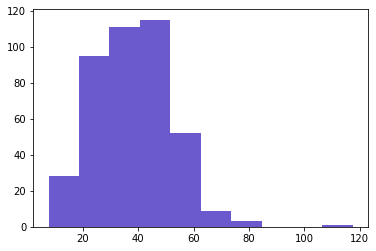

In [6]:
plt.hist(data['Y house price of unit area'],color='slateblue')

### How the distance to the nearest MRT station varies with House Prices

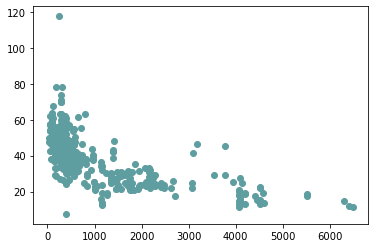

In [7]:
plt.scatter(data['X3 distance to the nearest MRT station'],data['Y house price of unit area'],color='cadetblue')

### How no of convenience stores affects House prices

<BarContainer object of 414 artists>

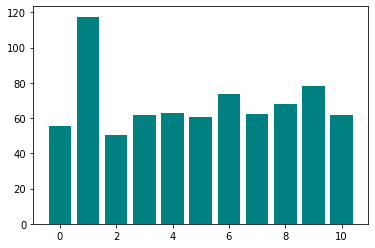

In [8]:
plt.bar(data['X4 number of convenience stores'],data['Y house price of unit area'],color='teal')

### How House age affects the Prices 

<BarContainer object of 414 artists>

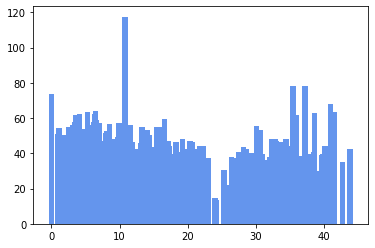

In [9]:
plt.bar(data['X2 house age'],data['Y house price of unit area'],color='cornflowerblue')

## How Latitude & Longitude affect the Prices

<BarContainer object of 414 artists>

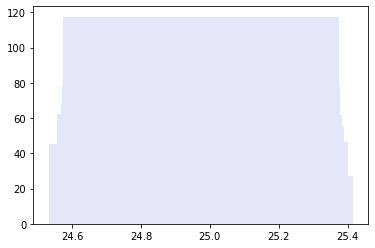

In [10]:
plt.bar(data['X5 latitude'],data['Y house price of unit area'],color='lavender')

<BarContainer object of 414 artists>

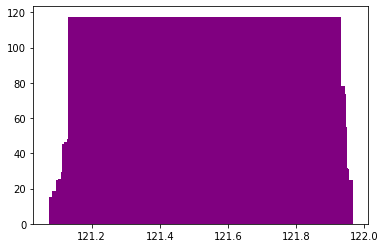

In [11]:
plt.bar(data['X6 longitude'],data['Y house price of unit area'],color='purple')

### Lets check null values 

<AxesSubplot:>

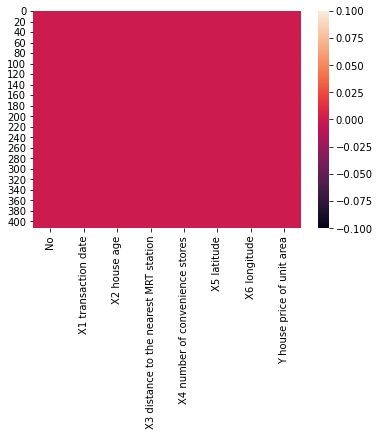

In [12]:
sns.heatmap(data.isnull())

### How is data distributed based on no of convenience stores

<AxesSubplot:xlabel='X4 number of convenience stores', ylabel='count'>

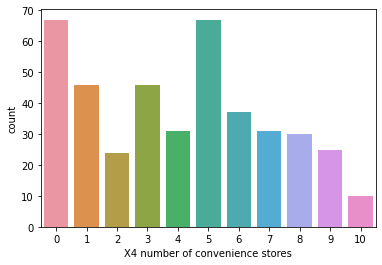

In [13]:
sns.countplot(x='X4 number of convenience stores',data=data)

### Distribution of data set based on convenience stores

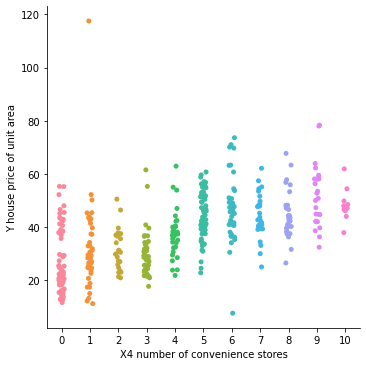

In [14]:
sns.catplot(x="X4 number of convenience stores",y="Y house price of unit area",data=data)

## Multicollinearity Check

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=new_data[['No','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude','Y house price of unit area']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["Features"]=variables.columns
vif

,VIF,Features
0,4.035051e+00,No
1,3.884903e+00,X2 house age
2,3.751429e+00,X3 distance to the nearest MRT station
3,5.162000e+00,X4 number of convenience stores
4,6.319008e+06,X5 latitude
5,6.312523e+06,X6 longitude
6,2.057939e+01,Y house price of unit area


In [16]:
x=new_data.drop('Y house price of unit area',axis=1)

In [17]:
y=new_data['Y house price of unit area'].values

In [18]:
x

,No,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,32.0,84.87882,10,24.98298,121.54024
1,2,19.5,306.59470,9,24.98034,121.53951
2,3,13.3,561.98450,5,24.98746,121.54391
3,4,13.3,561.98450,5,24.98746,121.54391
4,5,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,410,13.7,4082.01500,0,24.94155,121.50381
410,411,5.6,90.45606,9,24.97433,121.54310
411,412,18.8,390.96960,7,24.97923,121.53986
412,413,8.1,104.81010,5,24.96674,121.54067


In [19]:
y

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

## Dividing the dataset into training and testing

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [23]:
y_pred

array([32.78065939, 47.98929099, 22.10204458, 15.19761209, 44.8503255 ,
       33.03786286, 31.05280125, 44.00665979, 40.30993799, 12.56722022,
       13.77746172, 39.43262863, 30.71859464, 45.59570017, 52.25219038,
       34.01472381, 44.65125359, 43.33340939, 31.71243969, 46.02402495,
       52.27238987, 30.15241433, 40.47046534, 48.62622939, 46.39465931,
       28.72443706, 34.34073884, 45.75422988, 48.28585537, 14.37856332,
       35.78285408, 35.23314358, 40.85518389, 45.28666077, 48.78751661,
       14.27202333, 41.19057258, 40.77551918, 38.58015579, 15.07816662,
       42.23266743, 25.61823274, 52.26468864, 34.85166726, 33.43040641,
       39.42818078, 32.57087748, 40.78647438, 43.9195324 , 34.06604938,
       13.96305133, 43.2622446 , 47.75304284, 14.9461883 , 51.48570393,
       43.63558398, 44.38472756, 39.31526305, 40.67677346, 42.44953326,
       25.19986839, 41.91767658, 33.81276352, 13.92323617, 40.57187188,
       44.24295865, 39.34373696, 45.86524101, 15.57828353, 39.61

In [24]:
y_test

array([27.3, 54.4, 22. , 11.6, 45.4, 23. , 21.8, 32.2, 37.4, 22.6, 17.4,
       36.8, 23.1, 36.9, 56.3, 20.9, 43.5, 40.3, 27.7, 42.1, 46.6, 21.8,
       38.1, 53.7, 57.1, 26.6, 32.1, 56.8, 43.1, 16.7, 33.4, 34.2, 39.6,
       52.5, 47.1, 13. , 37.5, 32.5, 42.3, 20.5, 40.3, 16.1, 58.1, 33.4,
       30.8, 21.7, 20.9, 42.5, 38.1, 39.6, 18.6, 44.3, 39.7, 15.4, 50.8,
       36.3, 52.2, 37.8, 26.5, 42.5, 12.8, 32.9, 29.4, 19.2, 42.6, 32.4,
       42.7, 42.3, 15.9, 43.9, 44.5, 15.5, 29.8, 24.5, 50. , 37.2, 30.9,
       37. , 33.1, 59.6, 40.8, 52.2, 47.1])

In [25]:
from sklearn.metrics import mean_squared_error,r2_score

In [26]:
r_squared=r2_score(y_test,y_pred)

In [27]:
r_squared

0.7049569023103226

In [28]:
mse=mean_squared_error(y_test,y_pred)

In [29]:
mse

44.783427301026805

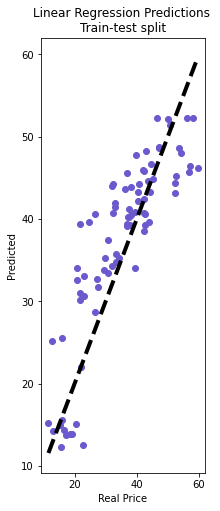

In [30]:

plt.figure(figsize=(10,8))

def plot_regression(real, predicted, color, title):
    plt.scatter(real, predicted, color=color)
    plt.plot([real.min(), real.max()], [real.min(), real.max()], 'k--', lw=4)
    plt.xlabel('Real Price')
    plt.ylabel('Predicted')
    plt.title(title)
    
#Real price vs train-test predictions plot 
plt.subplot(131)
plot_regression(y_test, y_pred, 'slateblue', 'Linear Regression Predictions \nTrain-test split')
plt.show()

## Decision Tree Regression

In [31]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [32]:
y_pred_dtr=dtr.predict(x_test)

In [33]:
y_test

array([27.3, 54.4, 22. , 11.6, 45.4, 23. , 21.8, 32.2, 37.4, 22.6, 17.4,
       36.8, 23.1, 36.9, 56.3, 20.9, 43.5, 40.3, 27.7, 42.1, 46.6, 21.8,
       38.1, 53.7, 57.1, 26.6, 32.1, 56.8, 43.1, 16.7, 33.4, 34.2, 39.6,
       52.5, 47.1, 13. , 37.5, 32.5, 42.3, 20.5, 40.3, 16.1, 58.1, 33.4,
       30.8, 21.7, 20.9, 42.5, 38.1, 39.6, 18.6, 44.3, 39.7, 15.4, 50.8,
       36.3, 52.2, 37.8, 26.5, 42.5, 12.8, 32.9, 29.4, 19.2, 42.6, 32.4,
       42.7, 42.3, 15.9, 43.9, 44.5, 15.5, 29.8, 24.5, 50. , 37.2, 30.9,
       37. , 33.1, 59.6, 40.8, 52.2, 47.1])

[Text(442.9251358695652, 369.32823529411763, 'X[2] <= 902.569\nmse = 223.383\nsamples = 83\nvalue = 37.548'),
 Text(231.61548913043478, 346.94470588235293, 'X[1] <= 6.85\nmse = 120.563\nsamples = 52\nvalue = 46.2'),
 Text(64.69565217391305, 324.56117647058824, 'X[5] <= 121.531\nmse = 96.706\nsamples = 12\nvalue = 57.608'),
 Text(38.81739130434782, 302.1776470588235, 'X[0] <= 293.0\nmse = 2.629\nsamples = 3\nvalue = 71.433'),
 Text(25.878260869565217, 279.7941176470588, 'X[0] <= 151.5\nmse = 1.69\nsamples = 2\nvalue = 72.3'),
 Text(12.939130434782609, 257.4105882352941, 'mse = 0.0\nsamples = 1\nvalue = 71.0'),
 Text(38.81739130434782, 257.4105882352941, 'mse = 0.0\nsamples = 1\nvalue = 73.6'),
 Text(51.756521739130434, 279.7941176470588, 'mse = -0.0\nsamples = 1\nvalue = 69.7'),
 Text(90.57391304347826, 302.1776470588235, 'X[1] <= 6.25\nmse = 43.118\nsamples = 9\nvalue = 53.0'),
 Text(77.63478260869564, 279.7941176470588, 'X[5] <= 121.545\nmse = 31.8\nsamples = 8\nvalue = 51.637'),
 Tex

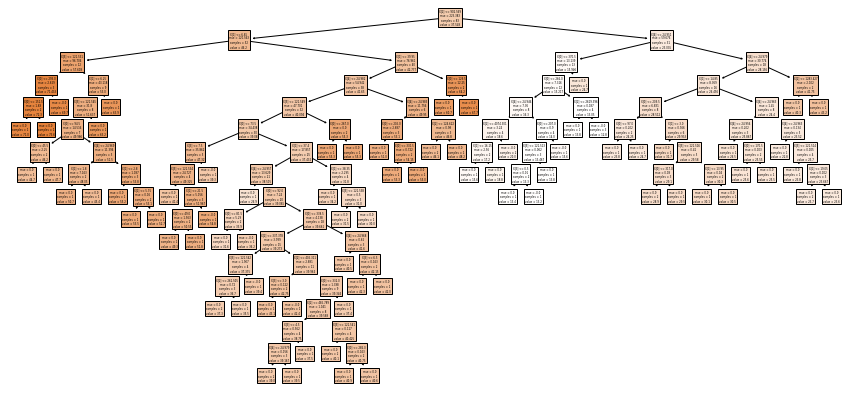

In [34]:
dft=dtr.fit(x_test,y_pred_dtr)
plt.figure(figsize=(15,7))
plot_tree(dtr,filled=True)

In [35]:
r_squared2=r2_score(y_test,y_pred_dtr)

In [36]:
r_squared

0.7049569023103226

In [37]:
mse=mean_squared_error(y_test,y_pred_dtr)

In [38]:
mse

77.05698795180723

## Random Tree Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

In [40]:
y_pred_rf

array([26.297, 48.886, 23.946, 17.31 , 78.486, 29.175, 25.824, 35.699,
       45.3  , 15.476, 16.244, 38.938, 25.192, 44.722, 53.43 , 24.357,
       79.321, 46.961, 24.643, 51.192, 45.171, 24.832, 37.011, 57.335,
       50.223, 26.424, 25.903, 52.112, 50.796, 15.055, 29.536, 40.388,
       39.965, 48.322, 45.803, 17.506, 39.574, 40.544, 40.383, 17.208,
       44.78 , 15.42 , 59.527, 30.384, 29.202, 29.776, 26.751, 40.765,
       43.471, 41.641, 14.988, 58.296, 45.008, 16.547, 49.644, 43.607,
       76.957, 40.671, 43.307, 39.43 , 15.148, 37.045, 26.774, 15.126,
       40.597, 51.516, 59.5  , 42.618, 18.55 , 40.018, 52.023, 17.02 ,
       37.929, 28.576, 57.665, 32.665, 34.047, 39.688, 35.53 , 50.601,
       44.467, 50.553, 45.228])

In [41]:
r_squared3=r2_score(y_test,y_pred_rf)

In [42]:
r_squared3

0.5502915067211708

In [43]:
mse=mean_squared_error(y_test,y_pred_rf)

In [44]:
mse

68.25947725301205

### END